# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [93]:
# Incorporated citipy to determine city based on latitude and longitude
#!pip install citipy

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json

# Import API key
from api_keys import api_key 
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [95]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [96]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + api_key + "&q="

#print(requests.get(url))
#response = requests.get(url).json()
#print(json.dumps(response, indent=4, sort_keys=True))

In [97]:
responses = []
city_dict = []

for city in cities:
    
    city_data = requests.get(url+city).json()
    responses.append(city_data)
    
    try:
        print(f"Processing City: {city_data['name']}")
        
        city_info = {'City Name': city_data['name'],
        'Country':city_data['sys']['country'],
        'Latitude':city_data['coord']['lat'],
        'Longitude':city_data['coord']['lon'], 
        'Temperature (F)':(city_data['main']['temp']),
        'Humidity (%)':(city_data['main']['humidity']),
        'Wind Speed (mph)':(city_data['wind']['speed']),
        'Cloud Cover (%)':(city_data['clouds']['all'])}
        city_dict.append(city_info)
        
    except:
        print(f"City {city} not found.")
        
city_df = pd.DataFrame(city_dict)

City attawapiskat not found.
Processing City: Ivanjica
Processing City: Tete
Processing City: Danville
Processing City: Rikitea
City aflu not found.
Processing City: Punta Arenas
Processing City: Sioux Lookout
Processing City: Cherskiy
Processing City: Esperance
Processing City: Iguape
Processing City: Mataura
Processing City: Piracuruca
Processing City: Hilo
Processing City: Qaanaaq
Processing City: Mehamn
Processing City: Cabo San Lucas
Processing City: Camargo
Processing City: Gizo
Processing City: Bredasdorp
Processing City: Lavrentiya
Processing City: Ocampo
City asau not found.
Processing City: Kapaa
Processing City: Ballina
Processing City: Imbituba
Processing City: Atuona
Processing City: Jiangyou
Processing City: Nikolskoye
Processing City: Kavieng
Processing City: Albany
Processing City: Hermanus
Processing City: Busselton
Processing City: Hobart
Processing City: Ushuaia
Processing City: Temiscaming
Processing City: East London
Processing City: Tiksi
Processing City: Jamestow

Processing City: Fortuna
Processing City: Kavaratti
Processing City: Hovd
Processing City: Letlhakeng
Processing City: Touros
Processing City: Fond du Lac
Processing City: Puerto Leguizamo
Processing City: Wattegama
Processing City: Cravo Norte
Processing City: Andilamena
Processing City: La Ronge
Processing City: Clyde River
Processing City: Marsabit
Processing City: Makasar
Processing City: Toledo
Processing City: Inirida
City beringovskiy not found.
Processing City: San Quintin
Processing City: Saint Augustine
Processing City: Port Augusta
Processing City: Naze
Processing City: Cervo
Processing City: Hernani
Processing City: Port-Gentil
Processing City: Pacific Grove
Processing City: Kovdor
Processing City: Mukhen
Processing City: Muros
Processing City: Hami
Processing City: Moen
Processing City: Exmouth
Processing City: Muriti
Processing City: Kewanee
City nizhneyansk not found.
Processing City: Chimbote
Processing City: Puerto Suarez
Processing City: Homa Bay
Processing City: Soui

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
city_df.to_csv("city_data.csv", encoding="utf-8", index=False)

In [99]:
city_df

,City Name,Cloud Cover (%),Country,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (mph)
0,Ivanjica,75,RS,85,43.58,20.23,20.10,5.82
1,Tete,75,MZ,83,-16.16,33.59,77.00,4.70
2,Danville,90,US,96,36.59,-79.40,44.26,4.70
3,Rikitea,100,PF,100,-23.12,-134.97,76.98,20.29
4,Punta Arenas,40,CL,88,-53.16,-70.91,53.60,35.57
5,Sioux Lookout,40,CA,86,50.10,-91.92,29.21,6.93
6,Cherskiy,56,RU,33,68.75,161.30,-22.30,3.51
7,Esperance,20,TT,51,10.24,-61.45,86.00,18.34
8,Iguape,76,BR,91,-24.70,-47.56,82.42,6.64
9,Mataura,56,NZ,58,-46.19,168.86,60.42,12.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

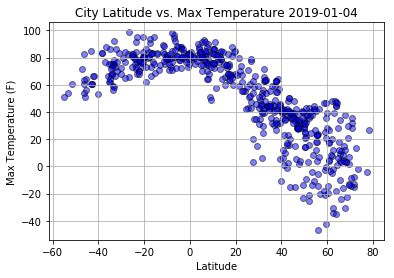

In [115]:
#City Latitude vs. Max Temperature
plt.scatter(city_df['Latitude'], city_df['Temperature (F)'], alpha=0.5, edgecolor ='black', color="blue")

#Chart elements
plt.title(f"City Latitude vs. Max Temperature {datetime.datetime.today().strftime('%Y-%m-%d')}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

#Save and print
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

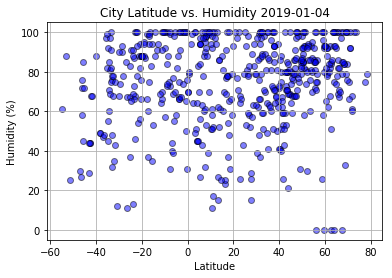

In [116]:
#City Latitude vs. Max Temperature
plt.scatter(city_df['Latitude'], city_df['Humidity (%)'], alpha=0.5, edgecolor ='black', color="blue")

#Chart elements
plt.title(f"City Latitude vs. Humidity {datetime.datetime.today().strftime('%Y-%m-%d')}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Save and print
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

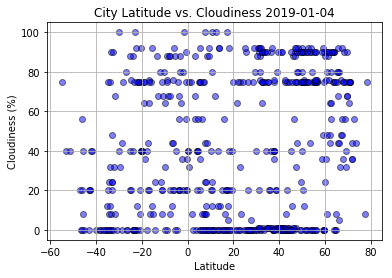

In [114]:
#City Latitude vs. Max Temperature
plt.scatter(city_df['Latitude'], city_df['Cloud Cover (%)'], alpha=0.5, edgecolor ='black', color="blue")

#Chart elements
plt.title(f"City Latitude vs. Cloudiness {datetime.datetime.today().strftime('%Y-%m-%d')}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

#Save and print
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

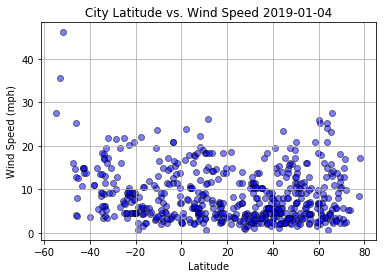

In [113]:
#City Latitude vs. Max Temperature
plt.scatter(city_df['Latitude'], city_df['Wind Speed (mph)'], alpha=0.5, edgecolor ='black', color="blue")

#Chart elements
plt.title(f"City Latitude vs. Wind Speed {datetime.datetime.today().strftime('%Y-%m-%d')}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

#Save and print
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()